In [2]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import seaborn as sns
sns.set()



In [10]:
#read csv file
train_df = pd.read_csv('../Data_Entry_2017_v2020.csv')

In [11]:
train_and_val = pd.read_csv('../train_val_list.txt', header=None, names=['Image Index'])

In [13]:
exp_sample = train_and_val.sample(n=1000)

In [14]:
#exp_sample.head()

In [15]:
#train_df.columns

In [16]:
result = pd.merge(exp_sample, train_df[['Image Index','Finding Labels', 'Patient ID']], on='Image Index')

In [17]:
result.head()

,Image Index,Finding Labels,Patient ID
0,00009749_001.png,Atelectasis,9749
1,00008888_024.png,No Finding,8888
2,00003610_001.png,No Finding,3610
3,00018964_013.png,Infiltration|Nodule|Pneumonia,18964
4,00017991_002.png,No Finding,17991


In [18]:
#result.shape

In [19]:
#t = result['Finding Labels'].str.get_dummies('|')

In [11]:
#result = pd.concat([result, t], axis=1)

,Image,PatientId,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00012880_006.png,12880,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,00010648_005.png,10648,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,00016378_002.png,16378,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00020987_000.png,20987,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,00012569_000.png,12569,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [16]:
#result.drop(['Finding Labels'], axis=1, inplace=True)

In [81]:
#result.to_csv("../train-small.csv")

In [82]:
result = pd.read_csv("../train-small.csv")

In [83]:
columns = result.keys()
columns = list(columns)
print(columns)

['Unnamed: 0', 'Image', 'PatientId', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [85]:
print(f"The total patient ids are {result['PatientId'].count()}, from those the unique ids are {result['PatientId'].value_counts().shape[0]} ")

The total patient ids are 1000, from those the unique ids are 946 


In [86]:
# Remove unnecesary elements
columns.remove('Image')
columns.remove('PatientId')
columns.remove('Unnamed: 0')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 14 columns of labels for these conditions: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [87]:
for c in columns:
    print(f"The class {c} has {result[c].sum()} samples")

The class Atelectasis has 100 samples
The class Cardiomegaly has 19 samples
The class Consolidation has 23 samples
The class Edema has 13 samples
The class Effusion has 88 samples
The class Emphysema has 21 samples
The class Fibrosis has 13 samples
The class Hernia has 1 samples
The class Infiltration has 160 samples
The class Mass has 34 samples
The class Nodule has 58 samples
The class Pleural_Thickening has 22 samples
The class Pneumonia has 9 samples
The class Pneumothorax has 22 samples


Display Random Images


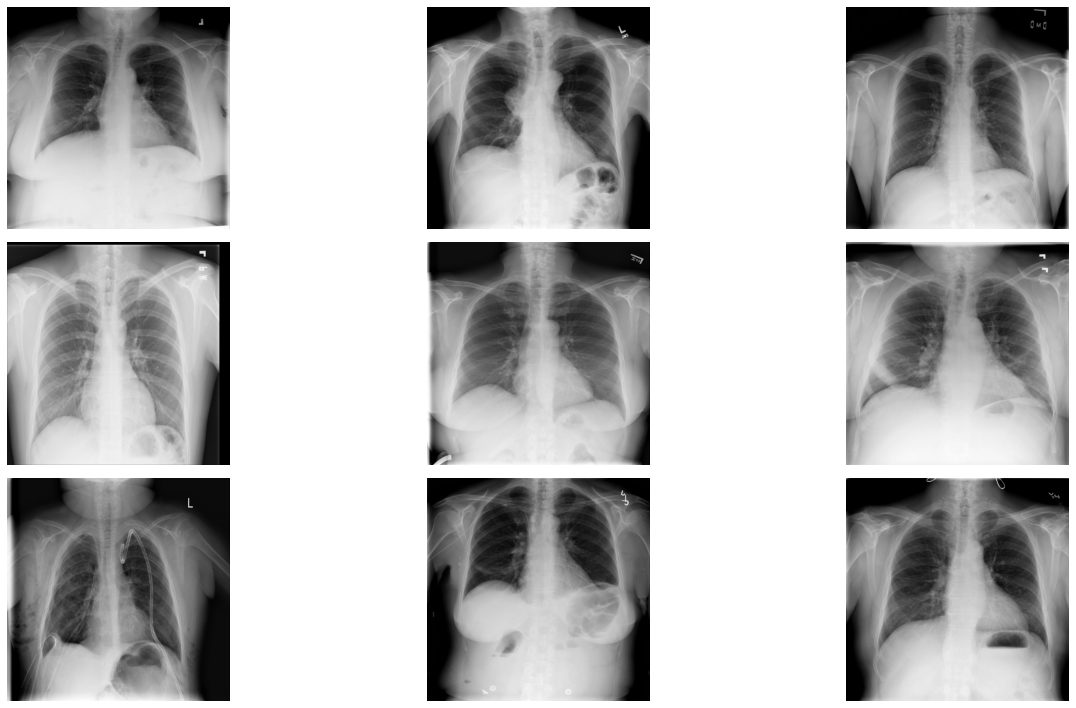

In [88]:
# Extract numpy values from Image column in data frame
images = result['Image'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = '../xray_dataset/images/'

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout() 

In [89]:
result.rename(columns = {'Image Index': 'Image', 'Patient ID': 'PatientId'}, inplace=True)

In [45]:
result.head()

,Image,PatientId,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00012880_006.png,12880,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,00010648_005.png,10648,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,00016378_002.png,16378,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00020987_000.png,20987,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,00012569_000.png,12569,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1]:
# Get the first image that was listed in the train_df dataframe
sample_img = result.Image[100]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
plt.axis("off")
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

NameError: name 'result' is not defined

Text(0, 0.5, '# Pixels in Image')

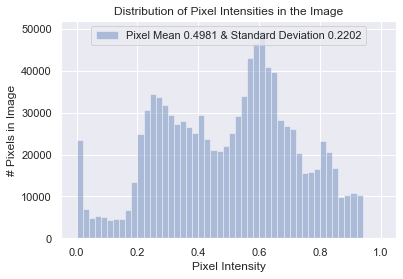

In [91]:
# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [92]:
# Import data generator from keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [93]:
# Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True # Divide each input by its standard deviation
)

In [94]:
# Flow from directory with specified batch size and target image size
generator = image_generator.flow_from_dataframe(
        dataframe=result,
        directory=img_dir,
        x_col="Image", # features
        y_col= ['Mass'], # labels
        class_mode="raw", # 'Mass' column should be in train_df
        batch_size= 1, # images per batch
        shuffle=False, # shuffle the rows or not
        target_size=(320,320) # width and height of output image
)

Found 1000 validated image filenames.


In [95]:
result['Mass'].count()

1000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 2.2752 and the minimum is -2.2531
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


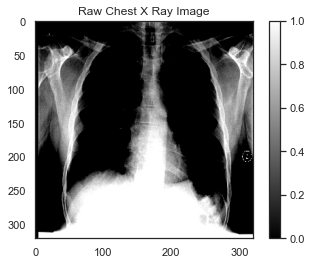

In [96]:
# Plot a processed image
sns.set_style("white")
generated_image, label = generator.__getitem__(100)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixel')

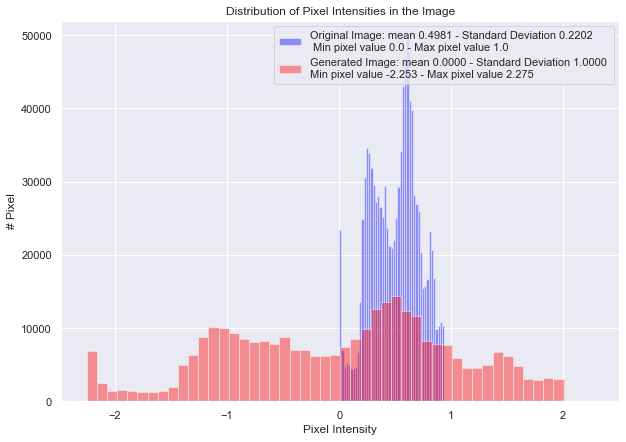

In [97]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')